In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [2]:
address = 'Fort Lauderdale'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Broward are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Broward are 26.1223084, -80.1433786.


In [3]:
CLIENT_ID = 'IDE0AR3ROJKHZKMHMSYMC2Y5ONYYGKV3OMEYC3GLYBV0W4RH' # your Foursquare ID
CLIENT_SECRET = 'XURHXOQ4VR45J45G34K5M3GF2AOGLSRHFAP0BVAERJQXSYEQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IDE0AR3ROJKHZKMHMSYMC2Y5ONYYGKV3OMEYC3GLYBV0W4RH
CLIENT_SECRET:XURHXOQ4VR45J45G34K5M3GF2AOGLSRHFAP0BVAERJQXSYEQ


In [4]:
LIMIT = 100
radius = 1600

url = 'https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d16e941735&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/search?categoryId=4bf58dd8d48988d16e941735&client_id=IDE0AR3ROJKHZKMHMSYMC2Y5ONYYGKV3OMEYC3GLYBV0W4RH&client_secret=XURHXOQ4VR45J45G34K5M3GF2AOGLSRHFAP0BVAERJQXSYEQ&v=20180605&ll=26.1223084,-80.1433786&radius=1600&limit=100'

In [5]:
results = requests.get(url).json()

In [6]:
results

{'meta': {'code': 200, 'requestId': '5c63a0c4351e3d194f87aaff'},
 'response': {'venues': [{'id': '4b8817b7f964a52047df31e3',
    'name': "McDonald's",
    'location': {'address': '27 W Broward Blvd',
     'lat': 26.12268,
     'lng': -80.1443,
     'labeledLatLngs': [{'label': 'display',
       'lat': 26.12268,
       'lng': -80.1443}],
     'distance': 100,
     'postalCode': '33301',
     'cc': 'US',
     'city': 'Fort Lauderdale',
     'state': 'FL',
     'country': 'United States',
     'formattedAddress': ['27 W Broward Blvd',
      'Fort Lauderdale, FL 33301',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d16e941735',
      'name': 'Fast Food Restaurant',
      'pluralName': 'Fast Food Restaurants',
      'shortName': 'Fast Food',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1550033092',
    'hasPerk': False},
   {'id': '4bcb78dc937ca593f9aca992',
    '

In [7]:
dict1 = results
dict1

{'meta': {'code': 200, 'requestId': '5c63a0c4351e3d194f87aaff'},
 'response': {'venues': [{'id': '4b8817b7f964a52047df31e3',
    'name': "McDonald's",
    'location': {'address': '27 W Broward Blvd',
     'lat': 26.12268,
     'lng': -80.1443,
     'labeledLatLngs': [{'label': 'display',
       'lat': 26.12268,
       'lng': -80.1443}],
     'distance': 100,
     'postalCode': '33301',
     'cc': 'US',
     'city': 'Fort Lauderdale',
     'state': 'FL',
     'country': 'United States',
     'formattedAddress': ['27 W Broward Blvd',
      'Fort Lauderdale, FL 33301',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d16e941735',
      'name': 'Fast Food Restaurant',
      'pluralName': 'Fast Food Restaurants',
      'shortName': 'Fast Food',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1550033092',
    'hasPerk': False},
   {'id': '4bcb78dc937ca593f9aca992',
    '

In [8]:
place = dict1['response']['venues'][21]['name']
lattitude = dict1['response']['venues'][21]['location']['lat']
longitude = dict1['response']['venues'][21]['location']['lng']
fooddata = print(place, lattitude, longitude)
fooddata

Subway 26.120230839518435 -80.13941243873747


In [9]:
other_path = "c:\\Users\\WD\\FFplaces.csv"
ff = pd.read_csv(other_path)

In [10]:
ff

,place,lat,long
0,McDonalds,26.122680,-80.144300
1,KFC,26.122635,-80.147881
2,SUBWAY,26.121846,-80.142505
3,DairyQueen,26.119348,-80.129204
4,PitaPit,26.119822,-80.144351
5,SunriseSubway,26.136950,-80.142189
6,925NuevosCubanos,26.135984,-80.144285
7,Rallys,26.134082,-80.140986
8,Checkers,26.124282,-80.129832
9,JimmyJohns,26.108447,-80.137377


In [11]:
locationlist = ff[["lat","long"]].values.tolist()
labels = ff["place"].values.tolist()

map = folium.Map(location=[26.1244, -80.2495], zoom_start=12)
for point in range(len(locationlist)):
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist[point], popup=popup).add_to(map)
    
map

In [12]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
other_path2 = "c:\\Users\\WD\\FFplaces.csv"
df1 = pd.read_csv(other_path2)
coords = df1.as_matrix(columns=['lat', 'long'])


C:\Users\WD\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [13]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 1


In [14]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [15]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})
rep_points


,lon,lat
0,-80.1443,26.12268


In [16]:
locationlist2 = rep_points[["lat","lon"]].values.tolist()
labels = df1["place"].values.tolist()

map = folium.Map(location=[26.1244, -80.2495], zoom_start=12)
for point in range(len(locationlist2)):
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist2[point], popup=popup).add_to(map)
    
map

In [17]:
other_path3 = "c:\\Users\\WD\\FLLcrashescleaned.csv"
fll = pd.read_csv(other_path3)

In [18]:
fll.head()

,Date,month,lat,long,Description
0,1/1/2018 4:56,1,26.136861,-80.103190,9TH STREET NE near SR A1A (N FT LAUDERDALE BC...
1,1/2/2018 8:40,1,26.122208,-80.140499,3RD AVE SE near SR842 - E BROWARD BLVD SR 842
2,1/2/2018 18:12,1,26.105620,-80.185840,SR 736 DAVIE BLVD at SW 31ST AV SW
3,1/2/2018 18:23,1,26.150770,-80.186920,STREET NW near NW 31 AVENUE NW
4,1/2/2018 20:22,1,26.119190,-80.138590,LAS OLAS BLVD at SE 5TH AVE SE


In [19]:
other_path5 = "c:\\Users\\WD\\Citytotal.csv"
ctotal = pd.read_csv(other_path5)

In [20]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

Text(0.5, 0, 'Month')

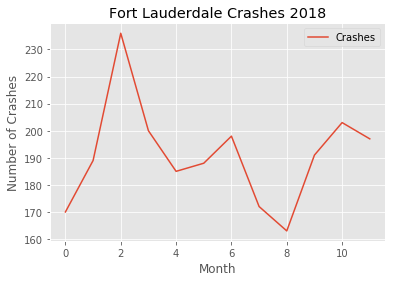

In [21]:
ctotal.plot()
plt.title('Fort Lauderdale Crashes 2018')
plt.ylabel('Number of Crashes')
plt.xlabel('Month')

In [22]:
locationlist = fll[["lat","long"]].values.tolist()
labels = fll["Description"].values.tolist()

map = folium.Map(location=[26.1244, -80.2495], zoom_start=12)
for point in range(len(locationlist)):
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist[point], popup=popup).add_to(map)
    
map

In [23]:
other_path4 = "c:\\Users\\WD\\FLLcrashescleaned.csv"
df2 = pd.read_csv(other_path4)
coords = df2.as_matrix(columns=['lat', 'long'])

C:\Users\WD\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
kms_per_radian = 6371.0088
epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 5


In [25]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)
centermost_points = clusters.map(get_centermost_point)

In [26]:
lats, lons = zip(*centermost_points)
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})
rep_points

,lon,lat
0,-80.151020,26.138440
1,-80.095748,26.320536
2,-80.156400,25.987640
3,-80.238864,25.768022
4,-80.230048,26.082734


In [27]:
locationlist2 = rep_points[["lat","lon"]].values.tolist()
labels = df2["Description"].values.tolist()

map = folium.Map(location=[26.1244, -80.2495], zoom_start=12)
for point in range(len(locationlist2)):
    popup = folium.Popup(labels[point], parse_html=True)
    folium.Marker(locationlist2[point], popup=popup).add_to(map)
    
map

In [28]:
ff.columns
ff.drop('place', 1, inplace=True)
ff.head()

,lat,long
0,26.122680,-80.144300
1,26.122635,-80.147881
2,26.121846,-80.142505
3,26.119348,-80.129204
4,26.119822,-80.144351


In [29]:
fll.columns

Index(['Date', 'month', 'lat', 'long', 'Description'], dtype='object')

In [30]:
fll.drop('Date', axis=1, inplace=True)
fll.head()

,month,lat,long,Description
0,1,26.136861,-80.103190,9TH STREET NE near SR A1A (N FT LAUDERDALE BC...
1,1,26.122208,-80.140499,3RD AVE SE near SR842 - E BROWARD BLVD SR 842
2,1,26.105620,-80.185840,SR 736 DAVIE BLVD at SW 31ST AV SW
3,1,26.150770,-80.186920,STREET NW near NW 31 AVENUE NW
4,1,26.119190,-80.138590,LAS OLAS BLVD at SE 5TH AVE SE


In [31]:
fll.drop('Description', axis=1, inplace=True)
fll.head()

,month,lat,long
0,1,26.136861,-80.103190
1,1,26.122208,-80.140499
2,1,26.105620,-80.185840
3,1,26.150770,-80.186920
4,1,26.119190,-80.138590


In [32]:
c1 = ff.corrwith(fll, axis=0, drop=False)
c1

lat      0.304420
long    -0.115427
month         NaN
dtype: float64

There is weak negative correlation between longitudes

There is a weak positive correlation between latitudes